# Applying Multinomial Naive Bayes 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score


In [ ]:
df=pd.read_csv(r'Depression_Tweet_Dataset.csv')
df.head(20)

,TID,TWEET,LABEL
0,189,worri mind im happi u meet,1
1,480,stay till selen friend bday awesom,1
2,230,im awesom suspect,1
3,37,long nap make happi,1
4,394,luck depress real stuck insid head pay attent ...,1
5,376,hey homi happi birthday massiv,1
6,434,danc cat depress isol covid pandem struggl sto...,0
7,152,parent r happi rest famili wonder memi folk r ...,1
8,760,girl work pull bibl breakroom convers heart sm...,1
9,647,bias day follow favourit person blindli truth ...,0


### Creating the Classifier with Hyper Parameters
> Hyper parameters are used to tune the model by running an exhaustive grid search and choosing the best parameters for improving the model accuracy.

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1]
}

### Train-Test Split in Ratio 80:20

In [ ]:
data=df['TWEET']
labels=df['LABEL']
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Train the Model and Generate Classification Report

In [ ]:
score = 'f1_macro'
print("# Tuning hyper-parameters for %s" % score)
print()
np.errstate(divide='ignore')
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring=score)
clf.fit(x_train, y_train)

print("Best parameters set found for the model:")
print()
print(clf.best_params_)
print()
print("Grid scores for development set:")
print()
for mean, std, params in zip(clf.cv_results_['mean_test_score'], 
                             clf.cv_results_['std_test_score'], 
                             clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, clf.predict(x_test), digits=4))
print()


# Tuning hyper-parameters for f1_macro

Best parameters set found for the model:

{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

Grid scores for development set:

0.881 (+/-0.107) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.883 (+/-0.109) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
0.667 (+/-0.181) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}
0.923 (+/-0.068) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}
0.927 (+/-0.076) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
0.667 (+/-0.181) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}
0.871 (+/-0.089) for {'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 

### Test the Model

In [ ]:
y_pred = clf.predict(x_test)
prediction = pd.DataFrame({'Tweets (Test)': [i for i in x_test], 'Label (Predicted)': [j for j in y_pred]})
prediction.head(10)

,Tweets (Test),Label (Predicted)
0,brilliant love compass humor class awesom role...,1
1,feel justifi hear love matern photosso beauti ...,1
2,danc cat depress isol covid pandem struggl sto...,0
3,sound awesom hope your fun wait luck rest rehears,1
4,drop state depress opposit state rebuild peopl...,0
5,im happi cc liquid gold pump tonight itll flow...,1
6,told male colleagu id postpartum depress nah w...,0
7,fight depress easi uncontrol sad,0
8,grate great marriag awesom kid busi rock guess...,1
9,happi friday eve,1


In [ ]:
comparison = pd.DataFrame({'Actual Label': y_test, 'Predicted Label': y_pred})
comparison.head(30)

,Actual Label,Predicted Label
275,1,1
93,1,1
6,0,0
167,1,1
90,0,0
513,1,1
362,0,0
228,0,0
192,1,1
482,1,1


### Model Metrics

In [ ]:
print('MAE(Mean Absolute Error)= ', metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score = ', round(metrics.r2_score(y_test, y_pred), 2))
print('Log Loss= ',metrics.log_loss(y_test, y_pred))
print('IoU (Jaccard Score)= ',metrics.jaccard_score(y_test,y_pred))
print('MSE(Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('RMSE(Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MSLE(Mean Squared Log Error', metrics.mean_squared_log_error(y_test, y_pred))

MAE = metrics.mean_absolute_error(y_test,y_pred)
NAE = np.sqrt(np.sum(np.square((y_test-y_pred) - MAE))/(len(y_test) - 1))
print('NAE(Normalised Absolute Error)= ', NAE)

MAE(Mean Absolute Error)=  0.038461538461538464
R2 Score =  0.85
Log Loss=  1.3284375420378214
IoU (Jaccard Score)=  0.9215686274509803
MSE(Mean Squared Error 0.038461538461538464
RMSE(Root Mean Squared Error 0.19611613513818404
MSLE(Mean Squared Log Error 0.018478962073776976
NAE(Normalised Absolute Error)=  0.20450490315512837


In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

#   predicted  1    0
#   actual
#   1          47   1
#   0          3    53


array([[47,  1],
       [ 3, 53]])

### Validating the Model with New Data

In [ ]:
def depressed_or_not(labels):
  d=[]
  for i in labels:
    if i==1: d.append('Not Depressed')
    elif i==0: d.append('Depressed')
  return d  

def depression_classifier(tweet):
  predicted_label=clf.predict(new_tweets)
  predicted_sentiment=depressed_or_not(predicted_label)
  for t,s in zip(tweet,predicted_sentiment):
    print('{}\nClassified as: {} tweet\n\n'.format(t,s))

In [ ]:
new_tweets=['''hello hk im soooo happi luv soooo much''',

'''depress start counsel next monthal want happi''', 

'''@Rishabverma740
Tere dukh tere he rahenge
Phir tu isko suna
Ya usko suna 
Kya farak padta hai
#depressed''', 

'''@SaojiTadka
Udaas rehne ki wajah to bohot hai life me..!!
Par fookat me khush rehne ka maza hi kuch aur hai.!! #happy #Sad #Life''',

'''@sidnaaz_ka
Happy birthday Preeti di 
Lots of love and prayers! ❤️❤️☺️☺️☺️
Hamesha khush rehna app!☺️''',

'''I feel lost inside myself! #illness #lifelessons #useless #depressed 
#ignored #worthless #pathetic..
''']

print(depression_classifier(new_tweets))

hello hk im soooo happi luv soooo much
Classified as: Not Depressed tweet


depress start counsel next monthal want happi
Classified as: Not Depressed tweet


@Rishabverma740
Tere dukh tere he rahenge
Phir tu isko suna
Ya usko suna 
Kya farak padta hai
#depressed
Classified as: Depressed tweet


@SaojiTadka
Udaas rehne ki wajah to bohot hai life me..!!
Par fookat me khush rehne ka maza hi kuch aur hai.!! #happy #Sad #Life
Classified as: Depressed tweet


@sidnaaz_ka
Happy birthday Preeti di 
Lots of love and prayers! ❤️❤️☺️☺️☺️
Hamesha khush rehna app!☺️
Classified as: Not Depressed tweet


I feel lost inside myself! #illness #lifelessons #useless #depressed 
#ignored #worthless #pathetic..

Classified as: Depressed tweet


None


The model works!

# Visual Representation of Model

#### ROC curve and PRECISION-RECALL curve

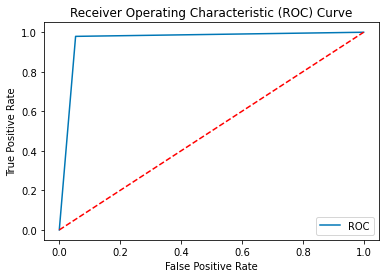

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='#0077b6', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds=roc_curve(y_test, y_pred)

plot_roc_curve(fpr, tpr)

Average precision-recall score: 0.93



Text(0.5, 1.0, '\nPrecision-Recall curve: AP=0.93')

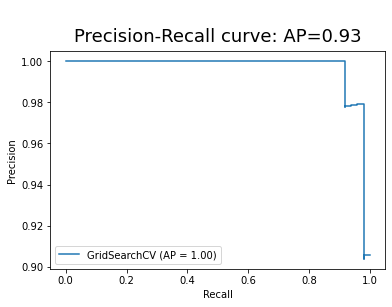

In [ ]:
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clf,x_test,y_test)
print()
disp.ax_.set_title('\nPrecision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), size=18, pad='10')